# The Dave Ramsey Portfolio

https://www.daveramsey.com/blog/daves-investing-philosophy

Step 1: Set goals for your investments.  
Step 2: Save 15% of your income for retirement.  
Step 3: Choose good growth stock mutual funds.  
Step 4: Invest with a long-term perspective.  
Step 5: Get help from an investing professional.  

Age: 38 Years Old  

Reitrement: Have 1 million dollar by age 60

College fund: Save $100,000 in ten years for daughter's tuition

Buy a home: Buy a $500,000  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
income_for_retirement = 5000 # Monthly
save_15_percent = 5000 * 0.15

In [3]:
print('Save 15% of your income for retirement: ', save_15_percent)
print('Save in a year: $', save_15_percent*12)
print('Save in 2 years: $', save_15_percent*24)
print('Save in 5 years: $', save_15_percent*60)
print('Save in 10 years: $', save_15_percent*120)
print('Save in 20 years: $', save_15_percent*240)
print('Save in age of 60: $', save_15_percent*264)
print('Save in age of 65: $', save_15_percent*324)

Save 15% of your income for retirement:  750.0
Save in a year: $ 9000.0
Save in 2 years: $ 18000.0
Save in 5 years: $ 45000.0
Save in 10 years: $ 90000.0
Save in 20 years: $ 180000.0
Save in age of 60: $ 198000.0
Save in age of 65: $ 243000.0


In [4]:
# input
symbols = ['VTSAX','SPY','VGSLX','VSIAX']
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  4 of 4 downloaded


,SPY,VGSLX,VSIAX,VTSAX
Date,,,,
2014-01-02,163.383347,72.174324,36.409233,41.514381
2014-01-03,163.356522,72.711060,36.523590,41.532322
2014-01-06,162.883148,73.026787,36.286076,41.406715
2014-01-07,163.883560,73.263588,36.549976,41.675892
2014-01-08,163.919250,73.003120,36.567574,41.693832


In [5]:
dataset.tail()

,SPY,VGSLX,VSIAX,VTSAX
Date,,,,
2018-12-24,231.115768,99.095360,45.703533,57.410362
2018-12-26,242.792862,102.520523,47.724945,60.261646
2018-12-27,244.656876,102.657135,47.872852,60.745079
2018-12-28,244.341248,102.949883,47.991177,60.725346
2018-12-31,246.481415,103.164574,48.326435,61.258110


In [6]:
# Calculate Daily Returns
returns = dataset.pct_change()
returns = returns.dropna()

In [7]:
returns.head()

,SPY,VGSLX,VSIAX,VTSAX
Date,,,,
2014-01-03,-0.000164,0.007437,0.003141,0.000432
2014-01-06,-0.002898,0.004342,-0.006503,-0.003024
2014-01-07,0.006142,0.003243,0.007273,0.006501
2014-01-08,0.000218,-0.003555,0.000481,0.000430
2014-01-09,0.000654,0.000324,0.001443,0.000645


In [8]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

SPY      0.000362
VGSLX    0.000327
VSIAX    0.000267
VTSAX    0.000345
dtype: float64


In [9]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

SPY      0.008306
VGSLX    0.009270
VSIAX    0.009084
VTSAX    0.008408
dtype: float64


In [10]:
# Define weights for the portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [11]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

            SPY     VGSLX     VSIAX     VTSAX
SPY    0.017247  0.011189  0.016896  0.017374
VGSLX  0.011189  0.021483  0.012191  0.011465
VSIAX  0.016896  0.012191  0.020630  0.017679
VTSAX  0.017374  0.011465  0.017679  0.017674


In [12]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [13]:
# Print the portfolio return
print(portReturn)

0.00032514438021171376


In [14]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [15]:
returns.head()

,SPY,VGSLX,VSIAX,VTSAX,Portfolio
Date,,,,,
2014-01-03,-0.000164,0.007437,0.003141,0.000432,0.002711
2014-01-06,-0.002898,0.004342,-0.006503,-0.003024,-0.002021
2014-01-07,0.006142,0.003243,0.007273,0.006501,0.005790
2014-01-08,0.000218,-0.003555,0.000481,0.000430,-0.000606
2014-01-09,0.000654,0.000324,0.001443,0.000645,0.000767


In [16]:
returns.tail()

,SPY,VGSLX,VSIAX,VTSAX,Portfolio
Date,,,,,
2018-12-24,-0.026423,-0.037350,-0.025442,-0.026435,-0.028912
2018-12-26,0.050525,0.034564,0.044229,0.049665,0.044746
2018-12-27,0.007677,0.001333,0.003099,0.008022,0.005033
2018-12-28,-0.001290,0.002852,0.002472,-0.000325,0.000927
2018-12-31,0.008759,0.002085,0.006986,0.008773,0.006651


In [17]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 SPY     VGSLX     VSIAX     VTSAX  Portfolio
Date                                                         
2018-12-24  1.414561  1.373000  1.255273  1.382903   1.367353
2018-12-26  1.486032  1.420457  1.310792  1.451585   1.428536
2018-12-27  1.497441  1.422350  1.314855  1.463230   1.435726
2018-12-28  1.495509  1.426406  1.318105  1.462754   1.437057
2018-12-31  1.508608  1.429381  1.327313  1.475588   1.446615


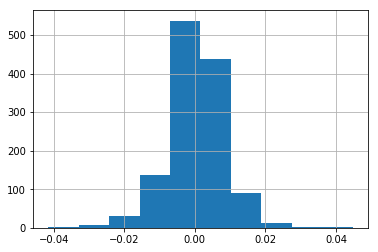

In [18]:
returns['Portfolio'].hist()
plt.show()

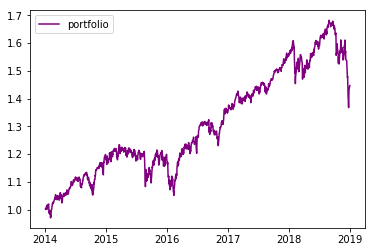

In [19]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [20]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.032514438021171314
Std. dev:  0.7915524366523183
skew:  -0.4078573639390761
kurt:  3.007279112651302


In [21]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

12.520000000000001%


In [22]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

1.5699999999999998%


In [23]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 5 year 
annualized_return = ((total_return + 1)**(1/5))-1

In [24]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [25]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

1.4906958426858135


In [26]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.032514438021171314
--------------------------------------------------
Downside risk:
SPY          0.696336
VGSLX        0.820082
VSIAX        0.706179
VTSAX        0.690994
Portfolio    0.606737
dtype: float64
--------------------------------------------------
Sortino ratio:
SPY         -1.389394
VGSLX       -1.179742
VSIAX       -1.370028
VTSAX       -1.400135
Portfolio   -1.594573
dtype: float64


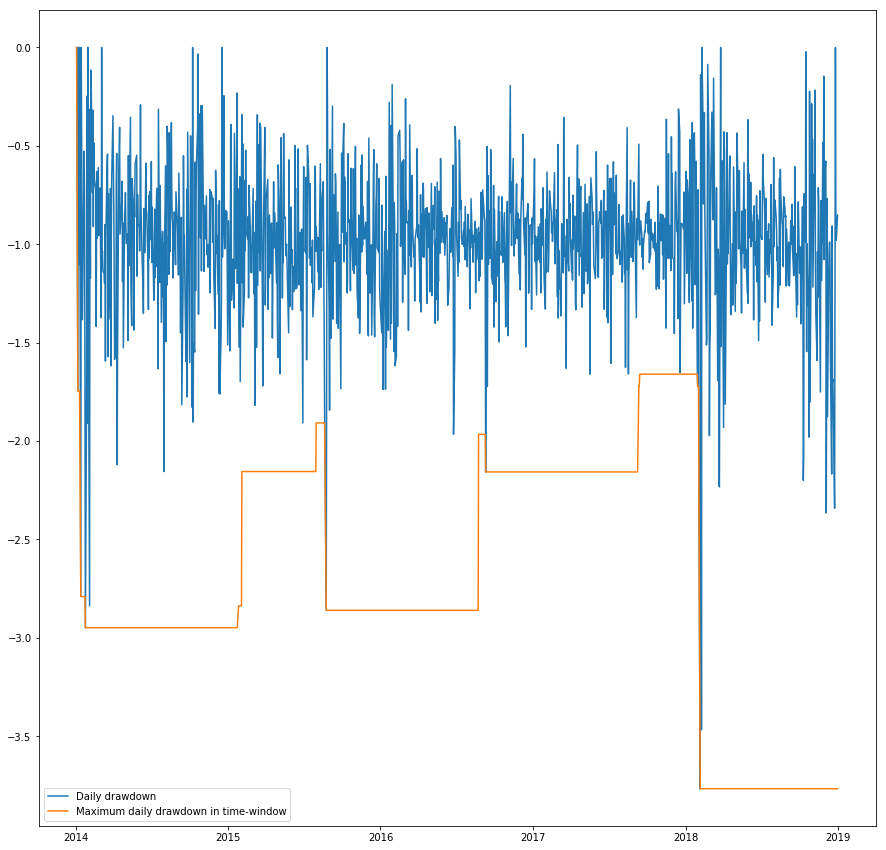

In [27]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

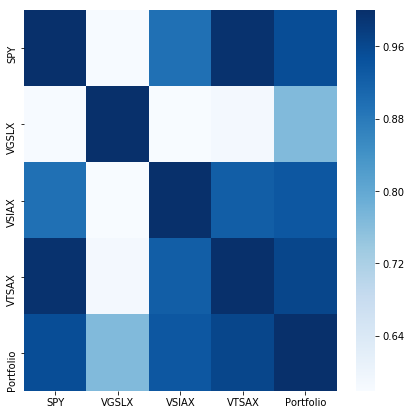

In [28]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

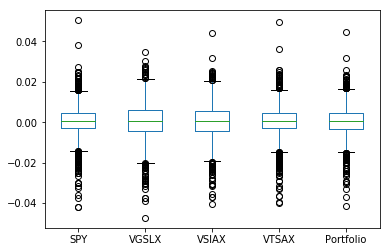

In [29]:
# Box plot
returns.plot(kind='box')

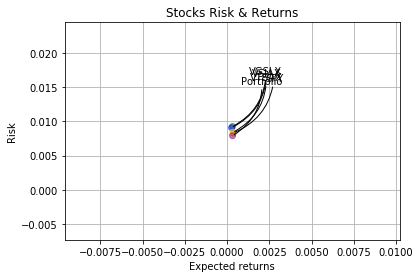

In [30]:
rets = returns.dropna()

colors=['red','green','blue','yellow','purple']
plt.scatter(rets.mean(), rets.std(), c=colors,alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

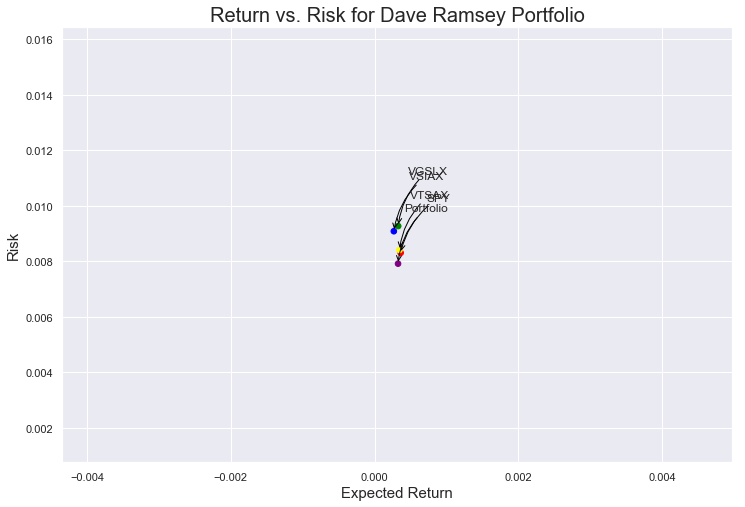

In [31]:
area = np.pi*10.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
colors=['red','green','blue','yellow','purple']

plt.scatter(rets.mean(), rets.std(), s=area, c=colors)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Dave Ramsey Portfolio", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.2', color = 'black'))

In [32]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
SPY          0.000362
VGSLX        0.000327
VSIAX        0.000267
VTSAX        0.000345
Portfolio    0.000325
dtype: float64
--------------------------------------------------
Stock risk:
SPY          0.008306
VGSLX        0.009270
VSIAX        0.009084
VTSAX        0.008408
Portfolio    0.007916
dtype: float64


In [33]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
VSIAX,0.000267,0.009084
Portfolio,0.000325,0.007916
VGSLX,0.000327,0.009270
VTSAX,0.000345,0.008408
SPY,0.000362,0.008306


In [34]:
table.sort_values(by='Risk')

,Returns,Risk
Portfolio,0.000325,0.007916
SPY,0.000362,0.008306
VTSAX,0.000345,0.008408
VSIAX,0.000267,0.009084
VGSLX,0.000327,0.009270


In [35]:
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
SPY,0.000362,0.008306,-1.160409
VGSLX,0.000327,0.009270,-1.043439
VSIAX,0.000267,0.009084,-1.071490
VTSAX,0.000345,0.008408,-1.148292
Portfolio,0.000325,0.007916,-1.222263


Dave Ramsey Portfolio is the lowest risk with lowest returns. Compare other portfolio strategies, Dave Ramsey Portfolio is the safest strategies.